<img src="https://github.com/sobester/ADRpy/raw/master/docs/ADRpy/ADRpy_splash.png" width="40%" align="left">

# Scaling an aircraft concept with ADRpy - the take-off constraint

Given a general layout (perhaps one of several candidates at this stage) and some idea of the maximum take-off weight, the next major step of the conceptual design process is the constraint analysis, which will yield the required wing area and thrust - effectively giving *scale* to the concept.

The constraint analysis establishes the boundaries of the feasible part of the thrust to weight ratio (T/W) versus wing loading (W/S) space. Each element of the mission of the aircraft 'bites out' a chunk from this space and the final aeroplane we will progress to the subsequent stages of the design process will have to 'live' in the remaining subspace - generally at the lowest thrust/smallest wing point of the remaining feasible chunk.

In this notebook we build the boundary associated with the take-off performance of the aeroplane, after discussing some key background concepts.

### Stall speeds

*Stall speeds* play an important role in early conceptual analysis due to their impact on the take-off, approach and landing constraints. Generically denoted $V_S$, the stall speed is the minimum airspeed at which the aircraft is able to maintain steady, level flight; in this state the angle of attack is at its critical (or stall) value. 

In an operational context, stall speed is generally expressed in terms of the indicated airspeed (to be precise, at the conceptual design level we take this to be the equivalent airspeed, but, let us use the $V_\mathrm{S (IAS)}$ notation for now), though we can write the lift equation at stall in terms of either IAS or TAS (note the different densities - $\rho_0$ is the sea level standard day ISA density):

$$L = W = \frac{1}{2}\rho_0 V_\mathrm{s (IAS)}^2 SC_\mathrm{Lmax}$$

$$L = W = \frac{1}{2}\rho V_\mathrm{s (TAS)}^2 SC_\mathrm{Lmax}.$$

Of course, we could also write the lift equation in terms of the stall dynamic pressure $q_\mathrm{s}$: $L = W = q_\mathrm{s}SC_\mathrm{Lmax}$ and we will do so later, but, for now, let us express the stall speed from one of the equations above, in order to make its drivers clear:

$$V_\mathrm{s(TAS)} = \sqrt{\frac{2 W/S}{\rho C_\mathrm{Lmax}}}.$$

Obviously the geometry of the aircraft (which determines the $C_\mathrm{Lmax}$) and its wing loading ($W/S$) are the key factors here. For this reason, stall speed related constraints have a massive impact on the cost and the complexity of the aircraft: increasing $C_\mathrm{Lmax}$ (and thus reducing stall speed) is generally achieved through more sophisticated and complicated high lift systems, as well as through more lightly loaded (and thus larger) wings.

In the case of aircraft with variable geometry wings -- such as, wings fitted with high lift devices -- $C_\mathrm{Lmax}$ also varies, so we always need to be specific about which configuration a particular $C_\mathrm{Lmax}$ (and thus, also, $V_\mathrm{s}$) relates to. Certification documents -- such as CS-25 -- use: 

- $V_\mathrm{S0}$ to denote stall speed in the 'everything hanging out' landing configuration and 
- $V_\mathrm{S1}$ to denote stall speed in some other, specified configuration.

### Rotation speed

Another important speed of the take-off is the *rotation speed* $V_\mathrm{R}$. The rotation phase of the take-off begins at the moment when the pilot makes a control input designed to lift the aircraft off the runway. 

The operational reasoning behind the selection of $V_\mathrm{R}$ is that, in case of subsequent engine failure, it should enable the aircraft to reach a take-off safety speed $V_2$ above a specified obstacle height.

For conceptual level take-off analysis the common first order estimate of the rotation speed is $V_\mathrm{R}=1.1V_\mathrm{S1}^\mathrm{TO}$, where $V_\mathrm{S1}^\mathrm{TO}$ is the stall speed in the take-off configuration (this estimate can be written in terms of any type of airspeed).

### Take-off technique

There are some key differences between how very light aircraft (of the order of, say, 10s of kg MTOW) and heavy transports should be treated from a conceptual take-off analysis perspective.

First, the take-off roll technique may be quite different. A radio-controlled aircraft pilot, operating from a grass field, may apply a slight nose-up elevator input some way before $V_R$ to ease the pressure on the wheels, thus reducing their rolling resistance (a similar technique is used on some large aircraft when taking off from contaminated runways). 

Second, very light unmanned aircraft will rotate practically instantaneously, so their lift-off speed $V_\mathrm{L}$ is approximately equal to $V_\mathrm{R}$, while large transport aeroplanes will rotate slowly (2-3 deg/s), lifting off 2.5-4 seconds later, potentially gaining a few more knots in the process (their rotation rates are a compromise between avoiding tail strike and exceeding the speed limits of their tyres).

In general, at the conceptual level, we will make the approximation $V_\mathrm{L}\approx V_\mathrm{R}$.

### Certification requirements 

According to CS 23.51, the corresponding speed $V_R$ must:
- not be less than the greater of 5% above the minimum controllable speed with critical engine inoperative $V_\mathrm{MC}$ and 10% above $V_\mathrm{S1}$ for twin engined aircraft and
- not less than $V_\mathrm{S1}$ for single engined aircraft.

CS 25.107 sets out a similar (though somewhat more complicated) methodology for calculating $V_\mathrm{R}$ for Part 25 aeroplanes. 

Once a concept is arrived at, its performance must be checked against these.

### A simple take-off performance model

#### From Newton's second law to the take-off constraint

To keep the notation as uncluttered as possible, we will, in what follows, consider runway projections of the acceleration, drag, thrust and resultant force without explicitly noting this.

Considering an aircraft on the runway, performing its take-off run, we shall denote the resultant forces acting on the aircraft with $F$. This force imparts the aircraft of mass $m$ an acceleration $a_\mathrm{TO}$:

$$F = m\frac{dV}{dt} = m\,a_\mathrm{TO}$$

From here the acceleration can be written, introducing the aircraft weight $W$, as:

$$a_\mathrm{TO} = \frac{F}{m} = \frac{g\,F}{W}$$

In terms of its projection on the direction of the runway we can write $F$ as the sum of the thrust $T$, the drag $D$ and the landing gear rolling resistance $\mu_\mathrm{R}(W-L)$:

$$a_\mathrm{TO} = \frac{g}{W}\left[T-D-\mu_\mathrm{R}(W-L)\right]$$.

In the above equation $g$ and $W$ are constant, but everything else varies during the take-off run. However, at this stage, we may not know enough about our tentative aeroplane to calculate these variations (also, we are after some very fast, first order estimates). Instead, we shall use representative constant values for lift, thrust and drag (denoted by $\overline{L}$, $\overline{T}$ and $\overline{D}$ respectively) and re-write the expression for an assumed constant take-off roll acceleration in these terms:

$$\overline{a_\mathrm{TO}} = \frac{g}{W}\left[\overline{T}-\overline{D}-\mu_\mathrm{R}(W-\overline{L})\right]$$

We are seeking an equation of the form $T/W=f(W/S)$ -- to that end, we re-arrange the above as:

$$\frac{\overline{T}}{W} = \frac{\overline{a_\mathrm{TO}}}{g} + \frac{\overline{D}}{W} + \mu_\mathrm{R}\left(1-\frac{\overline{L}}{W}\right)$$

The acceleration $\overline{a_\mathrm{TO}}$ that will result in a lift-off speed $V_\mathrm{L}$ at the end of a ground roll distance $d_\mathrm{G}$ is $V^2_\mathrm{L}/2d_\mathrm{G}$ (assumption at this early stage a uniformly accelerating motion). The average drag can be written as $\overline{D}=\overline{q}C_D^\mathrm{TO}S$ and the average lift as $\overline{L}=\overline{q}C_L^\mathrm{TO}S$. Assuming that at the end of the take-off roll the aircraft will generate a lift equal to its weight, we can replace the weight in the equation above with $W = q_\mathrm{TO}C_L^\mathrm{TO}S$, so we can rewrite the thrust to weight equation as:

$$\frac{\overline{T}}{W} = \frac{V^2_L}{2d_\mathrm{G}g} + \frac{\overline{q}C_D^\mathrm{TO}S}{q_\mathrm{TO}C_L^\mathrm{TO}S} + \mu_\mathrm{R}\left(1-\frac{\overline{q}C_L^\mathrm{TO}S}{q_\mathrm{TO}C_L^\mathrm{TO}S}\right)$$

Assuming that the dynamic pressure increases approximately uniformly during the take-off roll between zero and $q_\mathrm{TO}$, we will use the approximation $\overline{q} \approx \frac{1}{2}q_\mathrm{TO}$. Also using the 

$$V_L\approx V_\mathrm{R(TAS)} = 1.1V_\mathrm{S1(TAS)}^\mathrm{TO} = 1.1\sqrt{\frac{2 W/S}{\rho C_\mathrm{Lmax}^\mathrm{TO}}}$$

approximation introduced earlier (note that we have $\rho$ in the equation this time, and not $\rho_0$, as we are dealing with TAS - this is because $V_\mathrm{L}$ comes from a purely kinematic calculation and it is therefore, technically, ground speed, which, with the zero wind assumption, is equal to TAS), the (average) thrust to weight ratio required for a ground roll of $d_\mathrm{G}$ can be written as:

$$\frac{\overline{T}}{W} = 1.21\frac{W/S}{\rho C_\mathrm{Lmax}^\mathrm{TO}gd_\mathrm{G}}+\frac{1}{2}\frac{C_\mathrm{D}^\mathrm{TO}}{C_\mathrm{L}^\mathrm{TO}}+\frac{1}{2}\mu_\mathrm{R}$$


Broadly speaking, this equation breaks the required thrust to weight ratio down into three components.

The first is an inertial component -- the $\overline{T}/W$ required to accelerate the mass of the aeroplane to take-off speed. There is an element of aerodynamics here too, as the speed we need to achieve for lift-off depends on the maximum lift coefficient $C_\mathrm{Lmax}^\mathrm{TO}$. Further extending the high lift devices is the obvious way to increase this, but then that also increases drag (penalised by the next term), which is why hight lift devices tend not be used to their full capacity at take-off (the full capacity is usually set by the landing constraint).

The second component deals with most of the aerodynamics -- this rewards an aerodynamically efficient airframe; the higher the drag to lift ratio, the more thrust the propulsion system will have to supply.

The third term is driven by the rolling resistance, accounting for the thrust 'wasted' in overcoming the rolling resistance of the wheels. For CS-23/CS-25 scale aircraft values of $\mu_\mathrm{R}$ range from 0.03 (dry asphalt) to 0.08 (wet grass); higher values may be used for small unmanned aircraft.

#### The small print

Before pressing this model into service, we need to clarify some of its notations, limitations and assumptions.

First, the velocities. The calculations above assume zero wind. This means that we can just talk about 'speed' without specifying whether that mean *ground speed* in the inertial terms and *true airspeed* in the aerodynamic terms.

Next, the aerodynamic coefficients. $C_\mathrm{D}^\mathrm{TO}$ and $C_\mathrm{L}^\mathrm{TO}$ are the drag and lift coefficient values for the aircraft rolling along the runway, in take-off configuration (landing gear and take-off flaps down), wing in ground effect.

Further, the calculations set out above are based on the approximation, that at the speed $V_\mathrm{L}$ in this take-off configuration and with all wheels still on the ground, the net lift generated by the aircraft is equal to its weight. A moment later, when rotation occurs, everything will change as the angle of attack increases: the aircraft will generate more drag, but also more lift; as the lift exceeds the weight of the aircraft, a positive vertical acceleration will result as the wheels leave the ground.

$S_\mathrm{ref}$ is the reference area of the wing, with respect to which $C_\mathrm{D}^\mathrm{TO}$ and $C_\mathrm{L}^\mathrm{TO}$ are defined. In general, this is the planform (projected) area of the wing, though there are subtle differences in how this is calculated. The source of the variety of approaches here is that, on most aircraft, the low pressure areas above the two wings join together over the fuselage, so it makes sense to include into the area accounting some type of virtual extension of the wings up to the centreline of the aircraft. At this early stage in the design process we shall consider a simple trapeze planform, but it is important to be aware of the different methods used by different aircraft manufacturers when using their wing area (or lift/drag coefficient) data. For example, the wing area of Boeing aircraft is generally quoted using the *Wimpress method* (named after former chief aerodynamicist John K. Wimpress).

Next, a comment on the weight. $W$ in the equations above is clearly a *force*, but the fact that 'take-off weight' is almost always quoted in units of mass (typically kg, lbs, or tonnes) may confuse matters. Such numbers have to be converted into units of force when using these equations.

**Finally, an important clarification**. Up to this point we did not consider how the thrust was generated and this will become important when we start using constraint charts in anger. The type of propulsion system will determine what 'post-processing' we need to apply to the result -- we shall return to this later. First though, let us consider the basics of the ADRpy implementation of this model through a simple example.

### ADRpy implementation of the take-off constraint - a first example

In [1]:
from ADRpy import atmospheres as at
from ADRpy import constraintanalysis as ca
import numpy as np
import matplotlib.pyplot as plt
import unitconversions as co

The atmosphere model, which the aircraft will be designed for -- we set up the appropriate `Atmosphere` class object:

In [2]:
designatm = at.Atmosphere()

The design brief, the basic design variables of the first order concept and initial aero estimates are stored in three dictionaries:

In [3]:
designbrief = {'groundrun_m':60}
designdefinition = {'aspectratio':9, 'bpr':-1} 
designperformance = {'CDTO':0.0898, 'CLTO':0.97, 'CLmaxTO':1.7, 'mu_R':0.08}

We can now instantiate an `AircraftConcept` class object with these inputs:

In [4]:
concept = ca.AircraftConcept(designbrief, designdefinition, designperformance, designatm)

We next select a range of $W/S_\mathrm{ref}$ wing loading values (in N/m$^2$ (Pa)) appropriate for the type of aircraft we are designing. Typically, light aircraft populate the lower end of the $W/S_\mathrm{ref}$ spectrum, up to about 1 kN/m$^2$, with light unmanned aircraft in the lower half of this range. Large transport aircraft tend to occupy the upper end of the spectrum, featuring wing loadings (calculated on the basis of the maximum take-off weight) of 5...9 kN/m$^2$.

We next call the `thrusttoweight_takeoff` method associated with the `concept` object to compute the required thrust to weight ratios for two inputs: the range of wing loadings to be considered and the required ground run distance:

In [5]:
wingloadinglist_pa = np.arange(80, 250, 1)

In [6]:
twratio, liftoffspeed_mps = concept.thrusttoweight_takeoff(wingloadinglist_pa)

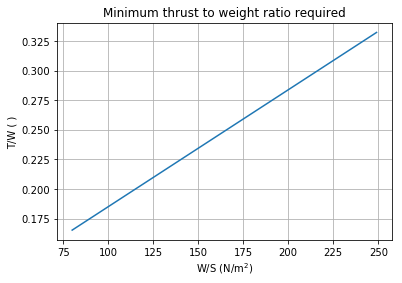

In [7]:
plt.plot(wingloadinglist_pa, twratio)
plt.ylabel("T/W ( )")
plt.xlabel("W/S (N/m$^2$)")
plt.title("Minimum thrust to weight ratio required")
plt.grid(True)
plt.show()

The `thrusttoweight_takeoff` method also returns the liftoff speed using the $V_\mathrm{L}\approx V_\mathrm{R} = 1.1V_\mathrm{S1}^\mathrm{TO}$ approximation introduced earlier:

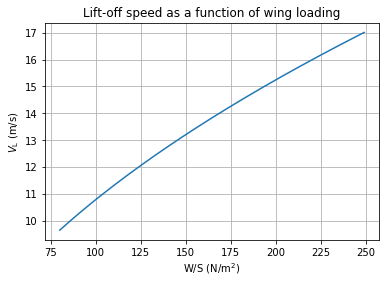

In [8]:
plt.plot(wingloadinglist_pa, liftoffspeed_mps)
plt.ylabel("$V_\mathrm{L}$ (m/s)")
plt.xlabel("W/S (N/m$^2$)")
plt.title("Lift-off speed as a function of wing loading")
plt.grid(True)
plt.show()

### Sensitivity analysis

The joy of a lightweight, fast, robust analytical model like the take-off constraint model developed above is that we can exercise it liberally, for example to assess the impact of changing one of the inputs. Consider, for example, a sweep of the required ground run variable; as expected, the stricter the ground roll requirement (shorter take-off distance), the greater the required thrust to weight ratio will be. Also, note that the gradient of the minimum $T/W$ curves also increases as the length of the ground run reduces.

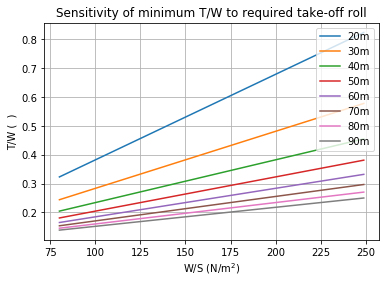

In [9]:
for groundrun_m in [20, 30, 40, 50, 60, 70, 80, 90]:
    designbrief = {'groundrun_m':groundrun_m}
    concept = ca.AircraftConcept(designbrief, designdefinition, designperformance, designatm)    
    twratio, liftoffspeed_mps = concept.thrusttoweight_takeoff(wingloadinglist_pa)
    plt.plot(wingloadinglist_pa, twratio, label = str(groundrun_m)+'m')

legend = plt.legend(loc='upper right', fontsize='medium')
plt.ylabel("T/W (  )")
plt.xlabel("W/S (N/m$^2$)")
plt.grid(True)
plt.title("Sensitivity of minimum T/W to required take-off roll")
plt.show()

A similar trend can be observed when we sweep a range of runway elevation values (from sea level to 5000 feet, just below the elevation of Denver Airport). As expected, the higher the density altitude, the more thrust per weight  will be required. 

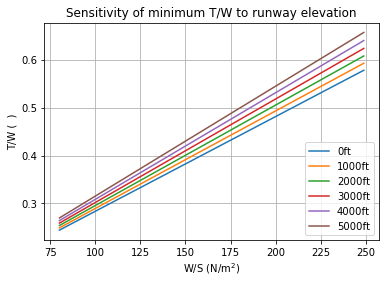

In [10]:
designbrief = {'groundrun_m':30}

for elevation_ft in [0, 1000, 2000, 3000, 4000, 5000]:
    designbrief = {'groundrun_m':30, 'rwyelevation_m':co.feet2m(elevation_ft)}
    concept = ca.AircraftConcept(designbrief, designdefinition, designperformance, designatm)
    twratio, liftoffspeed_mps = concept.thrusttoweight_takeoff(wingloadinglist_pa)
    plt.plot(wingloadinglist_pa, twratio, label = str(elevation_ft)+'ft')

    
legend = plt.legend(loc='lower right', fontsize='medium')
plt.ylabel("T/W (  )")
plt.xlabel("W/S (N/m$^2$)")
plt.grid(True)
plt.title("Sensitivity of minimum T/W to runway elevation")
plt.show()

Let us now consider sweeping a range of temperatures (effectively constructing an ISA atmosphere object with a different offset each time):

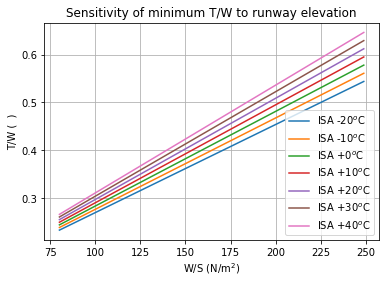

In [11]:
designbrief = {'groundrun_m':30, 'rwyelevation_m':0}

for temp_offset_deg in [-20, -10, 0, 10, 20, 30, 40]:
    
    designatm = at.Atmosphere(offset_deg=temp_offset_deg)
    concept = ca.AircraftConcept(designbrief, designdefinition, designperformance, designatm)
    twratio, liftoffspeed_mps = concept.thrusttoweight_takeoff(wingloadinglist_pa)
    
    if temp_offset_deg < 0: # Generating the labels needs a bit of care here
        plt.plot(wingloadinglist_pa, twratio, label = 'ISA ' + str(temp_offset_deg)+'$^o$C')
    else:
        plt.plot(wingloadinglist_pa, twratio, label = 'ISA +' + str(temp_offset_deg)+'$^o$C')
    
legend = plt.legend(loc='lower right', fontsize='medium')
plt.ylabel("T/W (  )")
plt.xlabel("W/S (N/m$^2$)")
plt.grid(True)
plt.title("Sensitivity of minimum T/W to runway elevation")
plt.show()

### Thrust mapping

Having computed a series of thrust to weight values, how do we read these in terms of sizing the propulsion system?

#### Piston engines

In the case of piston-engine powered aircraft, reading a required thrust to weight ratio off the constraint diagram is not especially helpful, because piston engines are selected on the basis of their nominal power. To this end, we need to convert the thrust into the power produced by the engine by multiplying it with the speed $V$ (ground speed or, with the zero wind assumption, TAS - note that this is a purely kinematic calculation independent of airflow) and dividing by the aerodynamic efficiency of the propeller $\eta_\mathrm{p}$ (usually up to 0.8 for modern propellers at their optimum operating point, quite a bit lower 'off-design' or for the small propellers typically used on light unmanned aircraft):

$$\frac{P}{W} = \frac{T}{W}V\frac{1}{\eta_\mathrm{p}}$$


This equation is implemented in the function `tw2pw` (`constraintanalysis` module), which takes as its arguments a thrust to weight ratio, a speed and an efficiency value (or `numpy` arrays for all three or a mix of `numpy` arrays and scalars).

Attention must be paid to the units here! T/W is non-dimensional, as is the efficiency. Thus, the resulting P/W ratio will have the same units as the speed $V$ we specify, units of length over time. The result will only be a speed in a purely mathematical sense though and it is best to think of it in terms of units of power per units of weight. If we specify $V$ in metres per second, the result will be in m/s, but this is actually equal to Watts (kg.m$^2$.s$^{-3}$) per Newton (kg.m.s$^{-2}$).

In the particular case of the take-off constraint for V we will use the lift-off speed - in ADRpy this is one of the outputs supplied by the `thrusttoweight_takeoff` that implements the T/W equation developed earlier.

Also taking into account the decline in the power of normally aspirated engines with altitude, if $f_\mathrm{GF}$ denotes the ratio of power at the given altitude and power at sea level, we can adjust the equation above with the generic P/W equation with this extra term:

$$\frac{P}{W} = \frac{1}{f_\mathrm{GF}}\frac{T}{W}V\frac{1}{\eta_\mathrm{p}}$$

The subscript 'GF' refers to the fact that the most commonly used model for this is the Gagg-Farrar approximation, which we have implemented in the `pistonpowerfactor` function (in the `atmospheres` module). This takes the density at the given altitude as its argument, specified in kg/m$^3$.

We will shortly introduce a set of functions - one for each constraint - that take care of all of this 'under the hood'by multiplying the Gagg-Farrar term into the thrust to weight value if a piston engine is specified (these functions 'know' that you are using a piston engine from the `designdefinition` dictionary, where you assign `-1` to the the bypass ratio entry to indicate 'piston engine').

For now though, in the interest of clarity, let us consider a fully 'spelled out' Python implementation (ADRpy's `thrusttoweight_takeoff`, for a range of runway elevations, with the vector `pwratio` denoting the left hand side of the above equation.

One final note before diving into the calculations: we need to specify the propeller efficiency and because this may vary (and almost always does vary) depending on the phase of flight, we define an `etap` ($\eta_\mathrm{p}$) for each type of constraint. In ADRpy $\eta_\mathrm{p}$ has its own dictionary, with a key-value pair for take-of, one for climb, etc. (we only need the take-off one for now, but, in the interest of completeness, we specify the full list below):

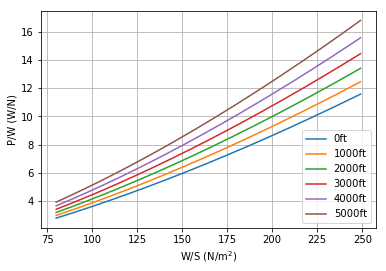

In [12]:
designdefinition = {'aspectratio':9, 'bpr':-1} 

etap = {'take-off': 0.6, 'climb': 0.75, 'cruise': 0.85, 'turn': 0.85, 'servceil': 0.6}

designperformance = {'CDTO':0.0898, 'CLTO':0.97, 'CLmaxTO':1.7, 'mu_R':0.08, 'etaprop': etap}

designatm = at.Atmosphere()

for elevation_ft in [0, 1000, 2000, 3000, 4000, 5000]:
    
    designbrief = {'groundrun_m':30, 'rwyelevation_m':co.feet2m(elevation_ft)}

    concept = ca.AircraftConcept(designbrief, designdefinition, designperformance, designatm)
    
    gffactor = at.pistonpowerfactor(designatm.airdens_kgpm3(co.feet2m(elevation_ft)))

    twratio, liftoffspeed_mps = concept.thrusttoweight_takeoff(wingloadinglist_pa)
    
    avspeed_mps = liftoffspeed_mps / np.sqrt(2)

    pwratio = (1 / gffactor) * ca.tw2pw(twratio, avspeed_mps, etap['take-off'])

    plt.plot(wingloadinglist_pa, pwratio, label = str(elevation_ft)+'ft')

legend = plt.legend(loc='lower right')
plt.ylabel("P/W (W/N)")
plt.xlabel("W/S (N/m$^2$)")
plt.grid(True)
plt.show()

#### Gas turbine engines

We derived the equation for the minimum thrust to weight ratio required for take-off in terms of the average thrust $\overline{T}$. On the assumption that the thrust is constant during the take-off run we could use this value for the first order selection of a gas turbine engine; however, for the case of turbofan engines Torenbeek offers an approximation of the average thrust as a function of static take-off thrust $T_\mathrm{S}$ (which is the performance figure we would measure on a test bench and is therefore the 'catalogue' thrust value quoted for turbofan engines): 

$$\overline{T} \approx \frac{3}{4}\left(\frac{5+\lambda}{4+\lambda}\right)T_\mathrm{S},$$

where $\lambda$ is the bypass ratio. We can then apply this to map the original minimum thrust to weight ratio values to the required *static* thrust to weight values (in terms of wing loading):

$$\frac{T_\mathrm{S}}{W} \approx \frac{4}{3}\left(\frac{4+\lambda}{5+\lambda}\right)\frac{\overline{T}}{W}$$

The `map2static` method of the `AircraftConcept` class implements this mapping, taking the bypass ratio from the `design` dictionary argument of the class.

As we have seen in our discussion of the impact of atmospheric variables on propulsion performance, the thrust produced by a gas turbine engine varies strongly with ambient density and, to a lesser extent, with Mach number; thus, we need to consider from which runway elevations and in what temperature range the aircraft needs to operate on.

To this end, we also need to apply an altitude-based mapping to the required (static) thrust to weight values. We discussed such models in the notebook titled *'Introduction to Modelling the Atmosphere for Design and Perf Calcs with ADRpy'* for turbojets, turbofans and turboprops, as well as their implementations in `turbojetthrustfactor`, etc.

We shall next demonstrate the application of these mappings in the case of a real design example, that of a high performance business jet.


### A second example: take-off performance of a business jet

Let us consider applying the models developed here to the design of a mid-size, high performance business jet. We shall use numbers broadly representative of the aerodynamics and performance requirements of mid-size business jets, such as the Learjet 45 family of aircraft.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from ADRpy import atmospheres as at
from ADRpy import constraintanalysis as ca
from ADRpy import unitconversions as co

Following the preamble, let us begin by setting up a design brief (containing the target runway elevation and the required ground run), a basic definition of the tentative design (including a bypass ratio and a throttle ratio representative of a Honeywell TFE731 turbofan) and its estimated aerodynamic parameters relevant to take-off performance:

In [14]:
designbrief = {'rwyelevation_m':1000, 'groundrun_m':1200}
designdefinition = {'aspectratio':7.3, 'bpr':3.9, 'tr':1.05} 
designperformance = {'CDTO':0.04, 'CLTO':0.9, 'CLmaxTO':1.6, 'mu_R':0.02}

We will examine a wing loading range representative of the middle of the spectrum, between light aircraft and large transports, 2-5kN/m$^2$.

In [15]:
wingloadinglist_pa = np.arange(2000, 5000, 10)

We can now instantiate the objects describing the design atmosphere (the ISA in this case), the design runway and the basic concept of the aircraft itself:

In [16]:
designatm = at.Atmosphere()
concept = ca.AircraftConcept(designbrief, designdefinition, designperformance, designatm)

We can now calculate the baseline take-off constraint:

In [17]:
twratio, liftoffspeed_mps = concept.thrusttoweight_takeoff(wingloadinglist_pa)

We now need to apply the two corrections required by turbofan aircraft, one to map the $\overline{T}/W$ to $T_\mathrm{S}/W$ and one to compensate for above sea level runway elevations (not strictly required for this sea level design case) and for the impact of each wing loading resulting in a slightly difrerent lift-off speed and thus different Mach number:

In [18]:
twratio1 = concept.map2static() * twratio

In [19]:
temp_c = designatm.airtemp_c(designbrief['rwyelevation_m'])
pressure_pa = designatm.airpress_pa(designbrief['rwyelevation_m'])
mach = designatm.mach(liftoffspeed_mps, designbrief['rwyelevation_m'])

throttleratio = designdefinition['tr']

correctionvec = []
for i, tw in enumerate(twratio):
    twratio_altcorr = at.turbofanthrustfactor(temp_c, pressure_pa, mach[i], throttleratio, "lowbpr")
    correctionvec.append(twratio_altcorr)

In [20]:
twratio2 = twratio1 / twratio_altcorr

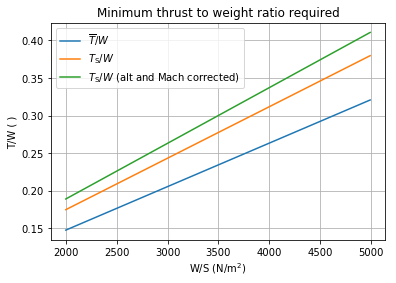

In [21]:
plt.plot(wingloadinglist_pa, twratio, label = '$\overline{T}/W$')
plt.plot(wingloadinglist_pa, twratio1, label = '$T_\mathrm{S}/W$')
plt.plot(wingloadinglist_pa, twratio2, label = '$T_\mathrm{S}/W$ (alt and Mach corrected)')

legend = plt.legend(loc='upper left')
plt.ylabel("T/W ( )")
plt.xlabel("W/S (N/m$^2$)")
plt.title("Minimum thrust to weight ratio required")
plt.grid(True)
plt.show()

### Uncertainty quantification

In the interest of compactness and generality, we combine the calculations presented above into a single function, `twrequired_to`, which is part of the `AircraftConcept` class in ADRpy's `constraintanalysis` module. The function `twrequired_to` takes the wing loading (in Pa) as its only argument - everything else is already available from the aircraft concept object we are applying this method to. 

As part of the preamble of the uncertainty quantification study we import pickle, as we will need it to 'un-pickle' the runway elevation data set.

In [22]:
import pickle
import random
import os
import ADRpy

The ADRpy package contains a database of runways longer than 1,200m - we shall use this dataset to get a representative set of runway elevations:

In [23]:
_fstr = os.path.join(ADRpy.__path__[0], "data", "elev1200m.dat")

with open(_fstr, 'rb') as fp:
    rwy_elevation_lst_ft = pickle.load(fp)

rwy_elevation_lst_m = [co.feet2m(el) for el in rwy_elevation_lst_ft]

Let us now construct a Monte Carlo sample, with the following input distributions:

In [24]:
twmatrix = []
wingloadinglist_pa = np.arange(2000, 5000, 10)
mc_samplesize = 1000

for i in range(1, mc_samplesize):
    r_elev_m = max(0, random.choice(rwy_elevation_lst_m))
    gr_m = np.random.normal(1200, 100)
    ar = np.random.uniform(6.5, 9)
    bpr = np.random.normal(4, 1)
    tr = np.random.uniform(1.04, 1.08)
    CDTO = np.random.normal(0.04, 0.005)
    CLTO = np.random.normal(0.9, 0.1)
    CLmaxTO = np.random.normal(1.6, 0.2)
    mu_R = np.random.uniform(0.015,0.025)
    offs_deg = np.random.normal(15, 15)
    
    designbrief = {'rwyelevation_m':r_elev_m, 'groundrun_m':gr_m}
    designdefinition = {'aspectratio':ar, 'bpr':bpr, 'tr':tr} 
    designperformance = {'CDTO':CDTO, 'CLTO':CLTO, 'CLmaxTO':CLmaxTO, 'mu_R':mu_R}
    designatm = at.Atmosphere(offset_deg=offs_deg, profile=None)
    
    concept = ca.AircraftConcept(designbrief, designdefinition, designperformance, designatm)
    
    
    tw_sl, speed_mps, avspeed_mps = concept.twrequired_to(wingloadinglist_pa)

    if np.size(twmatrix) > 0:
        twmatrix = np.vstack((twmatrix,tw_sl))
    else:
        twmatrix = tw_sl
        
    # You can comment this plot out for large samples - it is included here just as a sanity check
    mcplot = plt.plot(wingloadinglist_pa, tw_sl, linewidth=0.1)

A crude visualisation of the results - all of the constraint lines:

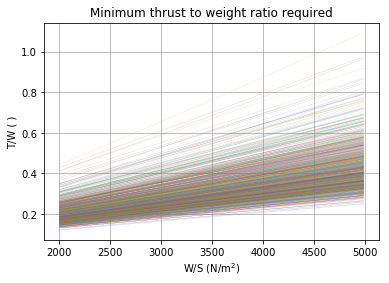

In [25]:
plt.ylabel("T/W ( )")
plt.xlabel("W/S (N/m$^2$)")
plt.title("Minimum thrust to weight ratio required")
plt.grid(True)
plt.show()

A better way to make sense of it all: looking at the mean and the standard deviation:

In [26]:
meantw = twmatrix.mean(axis=0)
stdtw = twmatrix.std(axis=0)

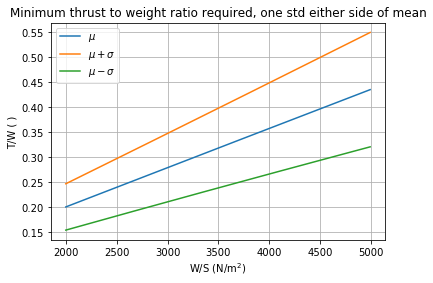

In [27]:
plt.plot(wingloadinglist_pa, meantw, label = '$\mu$')
plt.plot(wingloadinglist_pa, meantw+stdtw, label = '$\mu+\sigma$')
plt.plot(wingloadinglist_pa, meantw-stdtw, label = '$\mu-\sigma$')
legend = plt.legend(loc='upper left')
plt.ylabel("T/W ( )")
plt.xlabel("W/S (N/m$^2$)")
plt.title("Minimum thrust to weight ratio required, one std either side of mean")
plt.grid(True)
plt.show()

Let us cut a vertical slice through this at a $W/S$ roughly half-way along; actually around the 3300 N/m$^2$ mark, which is the maximum wing loading of the Learjet 45XR. We'll also use, as a reference, the maximum sea level static thrust to maximum take-off weight ratio of a Learjet 45XR equipped with a pair of Honeywell TFE731-20R turbofans (2x15570N thrust / (9752kg * 9.81m/s$^2$)) = 0.3255.

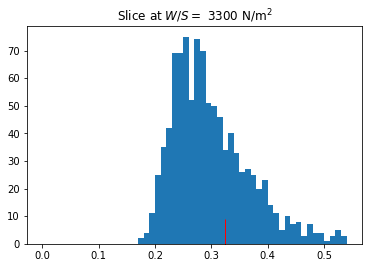

In [28]:
wheretoslice = 130
lear45tw = 0.325

plt.hist(twmatrix[:,wheretoslice], bins=np.arange(0,0.55,0.01))

# Vertical line representing the Learjet 45
plt.plot(lear45tw, 0, '|', markersize=50, color='red')

plt.title("Slice at $W/S = $ "+ str(wingloadinglist_pa[wheretoslice]) + " N/m$^2$")
plt.show()

Note the shape of the distribution - it is not a normal distribution, so the standard deviation is not too helpful in terms of giving us confidence intervals. So let us look at specific percentiles. How much risk are we prepared to take? Here is the median of this sample:

In [29]:
np.percentile(twmatrix[:,150],50)

0.2996120110715968

Or at a specific percentile:

In [30]:
feasible_percentile = 70

In [31]:
np.percentile(twmatrix[:,150],feasible_percentile)

0.34398236112731517

Note that the Learjet 45XR design point is almost exactly the `feasible_percentile = 70` (70 percentile) value. Let us now do this for the whole $W/S$ spectrum for this percentile and display it alongside the mean and the median of the sample:

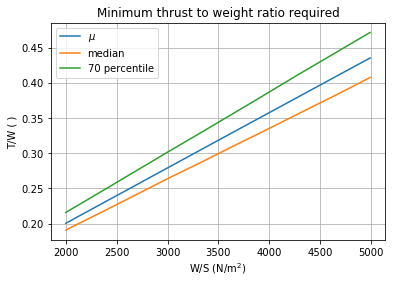

In [32]:
feasible_percentile = 70
percentile_tw = np.percentile(twmatrix, feasible_percentile, axis=0)
median_tw = np.percentile(twmatrix, 50, axis=0)
plt.plot(wingloadinglist_pa, meantw, label = '$\mu$')
plt.plot(wingloadinglist_pa, median_tw, label = 'median')
plt.plot(wingloadinglist_pa, percentile_tw, label = str(feasible_percentile)+' percentile')
legend = plt.legend(loc='upper left')
plt.ylabel("T/W ( )")
plt.xlabel("W/S (N/m$^2$)")
plt.title("Minimum thrust to weight ratio required")
plt.grid(True)
plt.show()

How about for a range of other percentile values (note the sudden leap in the strictness of the T/W constraint at high confidence values!):

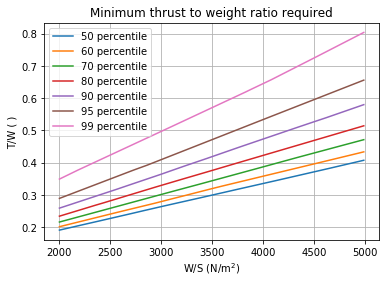

In [33]:
for feasible_percentile in [50, 60, 70, 80, 90, 95, 99]:
    percentile_tw = np.percentile(twmatrix, feasible_percentile, axis=0)
    plt.plot(wingloadinglist_pa, percentile_tw, label = str(feasible_percentile)+' percentile')

legend = plt.legend(loc='upper left')
plt.ylabel("T/W ( )")
plt.xlabel("W/S (N/m$^2$)")
plt.title("Minimum thrust to weight ratio required")
plt.grid(True)
plt.show()

We can re-run this once we have tighter bounds on the aerodynamics, just leaving the environmental uncertainty (e.g., temperature offset from ISA). Also, we could restrict the range of airport elevations/runway lengths to reflect a different market segment. This type of analysis also helps understand whether we save much by relaxing the take-off roll requirement (or, later on, other constraints).